In [1]:
# Visualize the results from a ode1_pinn.py run.

In [2]:
from importlib import import_module
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Specify the run ID (aka problem name).
runid = "linear"

# Add the subdirectory for the run results to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition from the run results directory.
p = import_module(runid)

# Read the run hyperparameters from the run results directory.
import hyperparameters as hp

In [4]:
# Load the training points, trained values, and trained derivatives
x_train = np.loadtxt(os.path.join(runid, "x_train.dat"))
y_train = np.loadtxt(os.path.join(runid, "y_train.dat"))
dy_dx_train = np.loadtxt(os.path.join(runid, "dy_dx_train.dat"))

In [5]:
# Load the validation points, validation values, and validation derivatives
x_val = np.loadtxt(os.path.join(runid, "x_val.dat"))
y_val = np.loadtxt(os.path.join(runid, "y_val.dat"))
dy_dx_val = np.loadtxt(os.path.join(runid, "dy_dx_val.dat"))

In [6]:
# Load the loss function histories.
losses = np.loadtxt(os.path.join(runid, "losses.dat"))
losses_in = np.loadtxt(os.path.join(runid, "losses_in.dat"))
losses_bc = np.loadtxt(os.path.join(runid, "losses_bc.dat"))

In [7]:
# Format the x-axis labels.
x_labels = ["%.1f" % x for x in x_train]

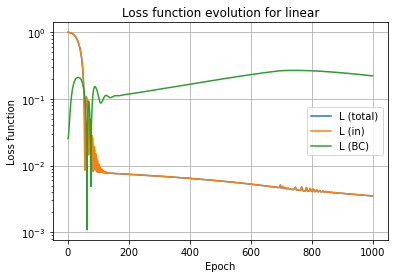

In [8]:
# Plot the loss function histories.
plt.semilogy(losses, label="L (total)")
plt.semilogy(losses_in, label="L (in)")
plt.semilogy(losses_bc, label="L (BC)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.grid()
plt.title("Loss function evolution for %s" % runid)
plt.show()

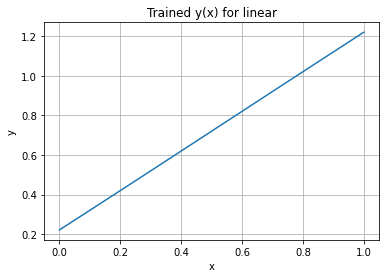

In [9]:
# Plot the trained y-values.
plt.plot(x_train, y_train)
plt.title("Trained y(x) for %s" % runid)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

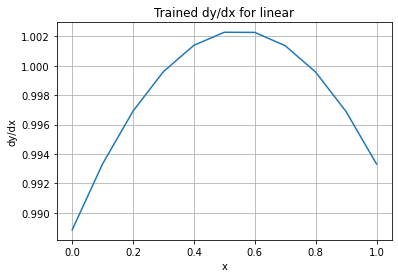

In [10]:
# Plot the trained dy/dx values.
plt.plot(x_train, dy_dx_train)
plt.title("Trained dy/dx for %s" % runid)
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid()
plt.show()

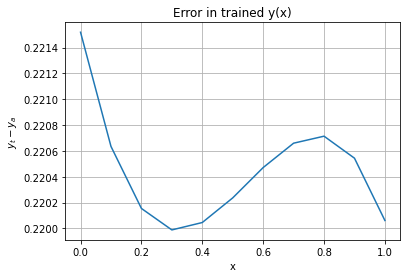

RMSE = 0.22045782740030184


In [11]:
# If the analytical solution is available, plot the error in the trained y-values.
if p.analytical_solution:
    y_analytical = p.analytical_solution(x_train)
    y_error = y_train - y_analytical
    rmse = np.sqrt(np.sum(y_error**2)/len(y_error))
    plt.plot(x_train, y_error)
    plt.title("Error in trained y(x)")
    plt.xlabel("x")
    plt.ylabel("$y_t - y_a$")
    plt.grid()
    plt.show()
    print("RMSE = %s" % rmse)

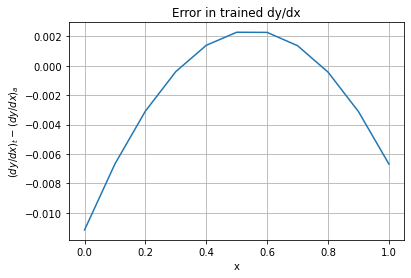

RMSE = 0.004739782508522435


In [13]:
# If the analytical derivative is available, plot the error in the trained dy/dx values.
if p.analytical_derivative:
    dy_dx_analytical = p.analytical_derivative(x_train)
    dy_dx_error = dy_dx_train - dy_dx_analytical
    rmse = np.sqrt(np.sum(dy_dx_error**2)/len(dy_dx_error))
    plt.plot(x_train, dy_dx_error)
    plt.title("Error in trained dy/dx")
    plt.xlabel("x")
    plt.ylabel("$(dy/dx)_t - (dy/dx)_a$")
    plt.grid()
    plt.show()
    print("RMSE = %s" % rmse)

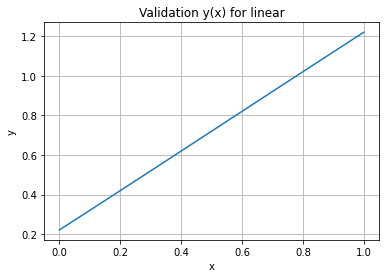

In [14]:
# Plot the validation y-values.
plt.plot(x_val, y_val)
plt.title("Validation y(x) for %s" % runid)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

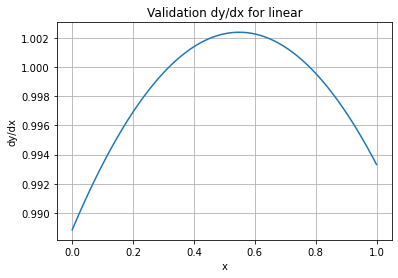

In [15]:
# Plot the validation dy/dx values.
plt.plot(x_val, dy_dx_val)
plt.title("Validation dy/dx for %s" % runid)
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid()
plt.show()

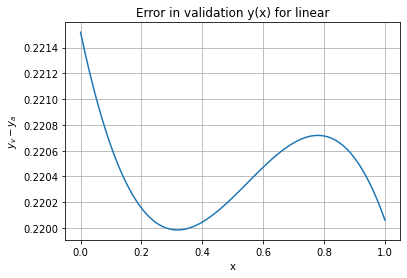

RMSE = 0.22042440005384575


In [16]:
# If the analytical solution is available, plot the error in the validation y-values.
if p.analytical_solution:
    y_analytical = p.analytical_solution(x_val)
    y_error = y_val - y_analytical
    rmse = np.sqrt(np.sum(y_error**2)/len(y_error))
    plt.plot(x_val, y_error)
    plt.title("Error in validation y(x) for %s" % runid)
    plt.xlabel("x")
    plt.ylabel("$y_v - y_a$")
    plt.grid()
    plt.show()
    print("RMSE = %s" % rmse)

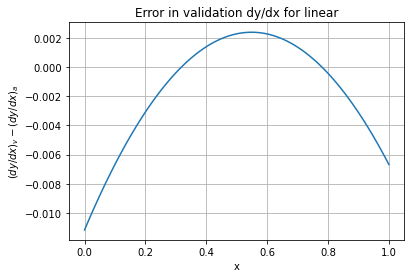

RMSE = 0.003950443709970317


In [17]:
# If the analytical derivative is available, plot the error in the validation dy/dx values.
if p.analytical_derivative:
    dy_dx_analytical = p.analytical_derivative(x_val)
    dy_dx_error = dy_dx_val - dy_dx_analytical
    rmse = np.sqrt(np.sum(dy_dx_error**2)/len(dy_dx_error))
    plt.plot(x_val, dy_dx_error)
    plt.title("Error in validation dy/dx for %s" % runid)
    plt.xlabel("x")
    plt.ylabel("$(dy/dx)_v - (dy/dx)_a$")
    plt.grid()
    plt.show()
    print("RMSE = %s" % rmse)